1 Physical GPUs, 1 Logical GPUs
(39, 132, 30, 1)


Training: 100%|██████████| 50/50 [00:09<00:00,  5.21it/s]


38/38 [==============================] - 0s 2ms/step - loss: 4184.5840
Train loss: 4184.583984375
Test loss: 2676.611083984375


Training: 100%|██████████| 50/50 [00:13<00:00,  3.64it/s]

62/62 [==============================] - 0s 1ms/step - loss: 3346.9976


Train loss: 3346.99755859375
Test loss: 2253.504638671875


Training: 100%|██████████| 50/50 [00:19<00:00,  2.58it/s]

87/87 [==============================] - 0s 1ms/step - loss: 2886.5159


Train loss: 2886.515869140625
Test loss: 2716.822509765625


Training: 100%|██████████| 50/50 [00:23<00:00,  2.09it/s]

 60/112 [===============>..............] - ETA: 0s - loss: 3129.9390

112/112 [==============================] - 0s 2ms/step - loss: 2650.2029
Train loss: 2650.202880859375
Test loss: 5560.40234375


Training: 100%|██████████| 50/50 [00:29<00:00,  1.72it/s]

 78/137 [================>.............] - ETA: 0s - loss: 2891.9548

137/137 [==============================] - 0s 1ms/step - loss: 3056.6184
Train loss: 3056.618408203125
Test loss: 2735.27490234375
2/2 [==============================] - 0s 3ms/step


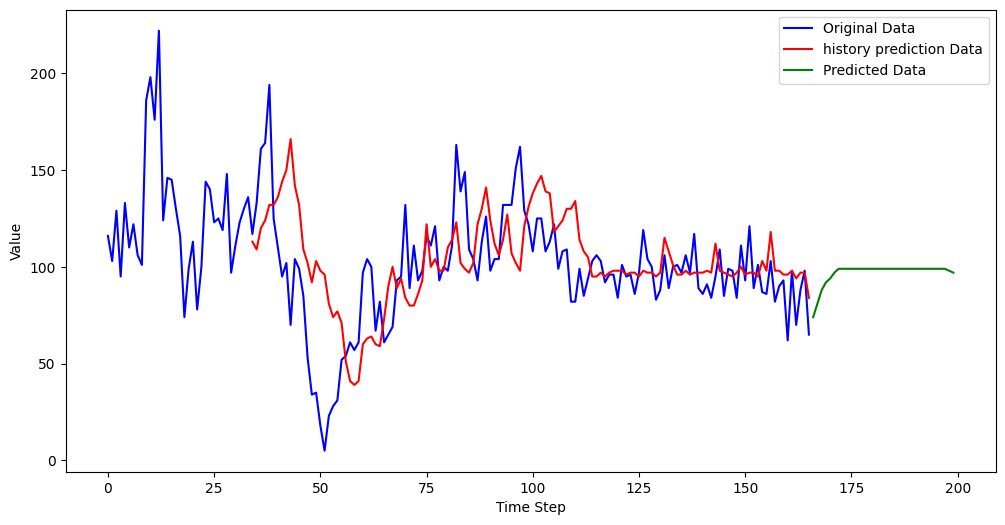

Training: 100%|██████████| 50/50 [00:04<00:00, 11.94it/s]


38/38 [==============================] - 0s 838us/step - loss: 3969.0320
Train loss: 3969.031982421875
Test loss: 3420.7216796875


Training: 100%|██████████| 50/50 [00:05<00:00,  9.12it/s]

 1/62 [..............................] - ETA: 0s - loss: 892.0861

62/62 [==============================] - 0s 795us/step - loss: 2762.2468
Train loss: 2762.246826171875
Test loss: 2542.78076171875


Training: 100%|██████████| 50/50 [00:06<00:00,  7.29it/s]

 1/87 [..............................] - ETA: 0s - loss: 1197.8081

87/87 [==============================] - 0s 846us/step - loss: 1979.8826
Train loss: 1979.882568359375
Test loss: 3733.84033203125


Training: 100%|██████████| 50/50 [00:08<00:00,  5.92it/s]

 1/25 [>.............................] - ETA: 0s - loss: 754.8826

112/112 [==============================] - 0s 774us/step - loss: 1485.4917
Train loss: 1485.49169921875
Test loss: 5965.90380859375


Training: 100%|██████████| 50/50 [00:10<00:00,  4.98it/s]

137/137 [==============================] - 0s 762us/step - loss: 1664.5912


Train loss: 1664.5911865234375
Test loss: 4421.47412109375
2/2 [==============================] - 0s 1ms/step


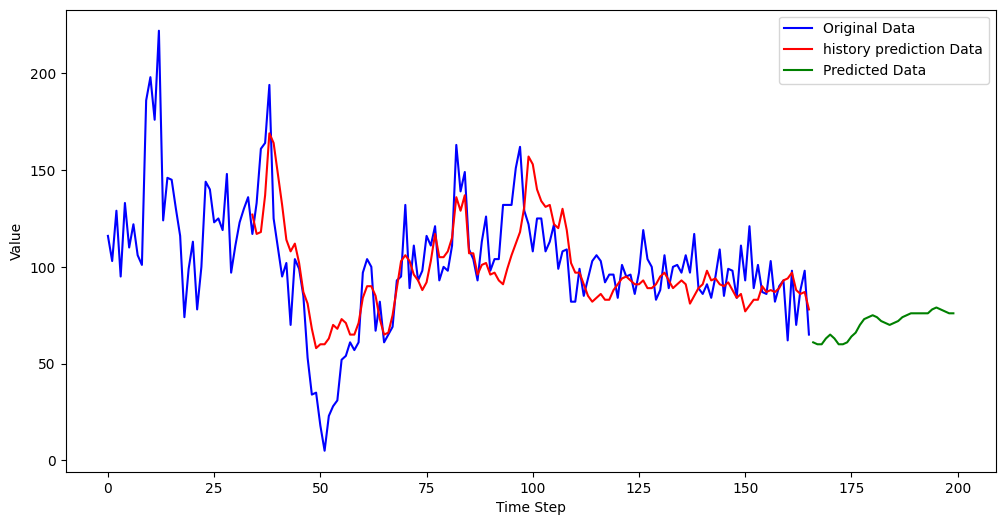

Training: 100%|██████████| 50/50 [00:04<00:00, 11.96it/s]


38/38 [==============================] - 0s 841us/step - loss: 3953.2139
Train loss: 3953.2138671875
Test loss: 3527.01708984375


Training: 100%|██████████| 50/50 [00:05<00:00,  9.91it/s]

 1/62 [..............................] - ETA: 0s - loss: 875.5663

62/62 [==============================] - 0s 784us/step - loss: 2497.0596
Train loss: 2497.0595703125
Test loss: 2646.430908203125


Training: 100%|██████████| 50/50 [00:06<00:00,  7.58it/s]

 1/87 [..............................] - ETA: 0s - loss: 700.5085

87/87 [==============================] - 0s 781us/step - loss: 1762.9282
Train loss: 1762.92822265625
Test loss: 3702.207275390625


Training: 100%|██████████| 50/50 [00:08<00:00,  6.06it/s]

 1/25 [>.............................] - ETA: 0s - loss: 838.7443

112/112 [==============================] - 0s 751us/step - loss: 1627.6183
Train loss: 1627.6182861328125
Test loss: 6112.142578125


Training: 100%|██████████| 50/50 [00:09<00:00,  5.19it/s]


137/137 [==============================] - 0s 756us/step - loss: 1958.3097
Train loss: 1958.3096923828125
Test loss: 3699.083251953125
2/2 [==============================] - 0s 811us/step


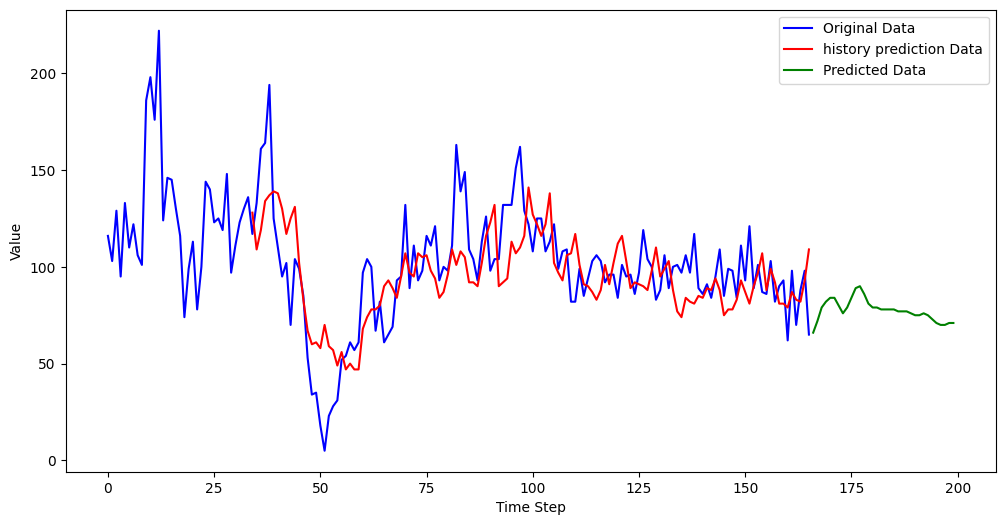

Final Choosen: GRU
(96, 132, 30, 1)


Training: 100%|██████████| 50/50 [00:09<00:00,  5.49it/s]

 1/66 [..............................] - ETA: 0s - loss: 3.8973

66/66 [==============================] - 0s 1ms/step - loss: 9.2244
Train loss: 9.224387168884277
Test loss: 7.237954139709473


Training:  36%|███▌      | 18/50 [00:05<00:10,  3.07it/s]


KeyboardInterrupt: 

In [5]:
from datetime import datetime
import time
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from keras.models import load_model


warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    
    # Memory growth must be set before GPUs have been initialized
    print(e)
tf.debugging.set_log_device_placement(True)


# 创建一个示例时间序列数据
# 这里的示例数据是随机生成的，请替换成你自己的时间序列数据
table = pd.read_csv("/workspace/数据处理编码withSTL_final.csv", encoding="utf-8", index_col=False)
# table_save = table.copy()
table_save = pd.read_csv("/workspace/table_save_3_.csv", encoding="utf-8", index_col=0)
for fenlei_index in range(0,22):
    fenlei = fenlei_index
    category_data = table[table['fenlei2'] == fenlei]
    start_index = 17
    category_t = category_data.columns[start_index:start_index+166]
    datetime_list = [datetime.timestamp(datetime.strptime(ts, '%Y/%m/%d')) for ts in category_t]

    category_ylist = category_data.iloc[:, start_index:start_index+166]

    time_series_data = np.array(category_ylist)

    # 定义滑动窗口的宽度与预测长度
    window_size = 30
    # 预测接下来的y_pre_len个时间点长度
    next_predict = 30

    y_pre_len = 5

    for i in range(next_predict+y_pre_len-1):
        table_save["extend_data"+str(i+1)] = np.nan #初始化nan

    #
    # # 创建一个示例时间序列数据，加入噪音信号
    # t = np.arange(0, 100, 1)  # 时间步
    # clean_data = np.sin(0.1 * t) * np.sin(0.8 * t)  # 示例函数
    #
    # # 创建包含10行数据的时间序列
    # num_rows = 10
    # data_rows = []
    #
    # # 为每一行数据创建不同的噪声信号
    # for i in range(num_rows):
    #     noise = np.random.normal(0, 0.1, 100)  # 每行数据的噪音信号
    #     row = clean_data + noise
    #     data_rows.append(row)
    #
    # time_series_data = np.array(data_rows)

    # 准备数据，将时间序列数据分割成输入（X）和输出（y）
    X = []
    y = []

    for i in range(time_series_data.shape[1] - window_size - y_pre_len+1):
        X.append(time_series_data[:, i:i + window_size])
        y.append(time_series_data[:, i + window_size:i + window_size + y_pre_len])

    X = np.array(X).transpose(1, 0, 2).reshape(-1, 166 - window_size- y_pre_len+1, window_size, 1)
    print(X.shape)
    y = np.array(y).transpose(1, 0, 2)

    loss_min = 99999
    final_choosen = None
    for model_choose_index in ["RNN","LSTM","GRU"]:
        model_choose = model_choose_index
        # # # 创建一个简单的RNN模型
        model = tf.keras.Sequential()
        if model_choose == "RNN":
            model.add(tf.keras.layers.SimpleRNN(256, input_shape=(window_size, 1)))
            model.add(tf.keras.layers.Dense(units = y_pre_len))


        # # # 创建一个LSTM模型
        # model = tf.keras.Sequential()
        # model.add(tf.keras.layers.LSTM(32, activation='relu', input_shape=(window_size, 1)))
        # model.add(tf.keras.layers.Dense(1))
        elif model_choose == "LSTM":
            model.add(tf.keras.layers.LSTM(256, input_shape=(window_size, 1)))  # 调整LSTM单元数和激活函数
            model.add(tf.keras.layers.Dense(units = y_pre_len))
        # # 添加Dropout层，可选
        # model.add(tf.keras.layers.Dropout(0.1))  # 调整Dropout率


        # 创建一个GRU模型
        # model = tf.keras.Sequential()
        elif model_choose == "GRU":
            model.add(tf.keras.layers.GRU(256, input_shape=(window_size, 1)))
            model.add(tf.keras.layers.Dense(units = y_pre_len))

        # 编译模型
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss="mean_squared_error")


        # 使用TimeSeriesSplit进行交叉验证

        tscv = TimeSeriesSplit(n_splits=5)
        loss_tmp = 0
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # 将输入数据形状调整为适合RNN模型的形状
            X_train = X_train.reshape(-1, window_size, 1)
            X_test = X_test.reshape(-1, window_size, 1)
            y_train = y_train.reshape(-1, y_pre_len, 1)
            y_test = y_test.reshape(-1, y_pre_len, 1)

            X_train, X_test = tf.convert_to_tensor(X_train), tf.convert_to_tensor(X_test)
            y_train, y_test = tf.convert_to_tensor(y_train), tf.convert_to_tensor(y_test)
            # 训练模型并添加动态进度条显示
            epochs = 50
            batch_size = 32  # 训练模型
            for epoch in tqdm(range(epochs), desc="Training"):
                model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0)
            
            # 在测试集上进行预测
            test_loss = model.evaluate(X_test, y_test)
            train_loss = model.evaluate(X_train, y_train)
            print("Train loss:", train_loss)
            print("Test loss:", test_loss)
            
            loss_tmp = loss_tmp + test_loss + train_loss


        # 预测历史时间步的值
        history_input = X
        history_input = history_input.reshape(-1, window_size, 1)
        history_predictions = []
        history_prediction = model.predict(history_input)
        history_predictions.append(history_prediction)

        history_predictions = np.array(history_predictions).reshape(-1, 166 - window_size - y_pre_len + 1, y_pre_len)[:,:,-1]

        # 预测未来时间步的值
        # future_input = X[:, -1:]  # 使用最后一个窗口的数据作为输入
        future_input = time_series_data[:, -window_size:]  # 选取最后数据作为初始预测未来的输入
        future_input = future_input.reshape(-1, window_size, 1)
        future_predictions = []


        for _ in range(next_predict):
            future_prediction = model.predict(future_input)
            future_predictions.append(future_prediction)
            # 更新输入窗口，添加新的预测值，删除第一个时间步的数据
            # future_input = np.concatenate((future_input[:, y_pre_len:, :], future_prediction.reshape(-1,y_pre_len,1)), axis=1)
            future_input = np.concatenate((future_input[:, 1:, :], np.round(future_prediction[:,0:1]).reshape(-1,1,1)), axis=1) # 步进1进行输入
            # print(future_input[1, -8:-1].reshape(1, -1))

        # 将预测结果转换为NumPy数组
        future_predictions = np.array(future_predictions).transpose(1,0,2).reshape(-1, next_predict, y_pre_len)

        # 创建一个长度为 next_predict+y_pre_len 的数组来存储输出
        final_output = np.zeros((future_predictions.shape[0],next_predict+y_pre_len-1))
        weights = np.zeros(next_predict+y_pre_len-1)

        # 对预测结果进行滑动窗口整合
        for i in range(future_predictions.shape[1]):
            final_output[:,i:i+5] += future_predictions[:,i]
            weights[i:i+5] += 1

        # 计算最终输出的平均值
        final_output = final_output /weights
        future_predictions = final_output.reshape(-1, next_predict + y_pre_len - 1, 1)

        future_predictions = np.round(future_predictions)
        history_predictions = np.round(history_predictions)

        # model.save("/workspace/model_save/"+"model_class_"+str(fenlei) + "_"+ model_choose +".h5")

        if loss_tmp<loss_min:

            # with open("/workspace/model_save1/"+"model_class_"+str(fenlei) + "_choosen"+".txt", 'w') as file:
                # file.write(model_choose_index)
            # model.save("/workspace/model_save1/"+"model_class_"+str(fenlei) + "_choosen" +".h5")
            loss_min = loss_tmp
            final_choosen = model_choose_index
            
            for i in range(future_predictions.shape[1]):
                table_save["extend_data"+str(i+1)].loc[category_data.index] = future_predictions[:,i].flatten()

            # table_save.loc[category_data.index].to_csv("/workspace/test.csv")

        select_index = 0
        plot_series_data = time_series_data[select_index]
        plot_future_prediction = future_predictions[select_index]
        plot_history_prediction = history_predictions[select_index]
        # 绘制时间序列数据和预测值，使用不同颜色区分
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(len(plot_series_data)), plot_series_data, label='Original Data', color='blue')
        plt.plot(np.arange(window_size + y_pre_len - 1, len(plot_series_data)), plot_history_prediction, label='history prediction Data', color='red')
        plt.plot(np.arange(len(plot_series_data), len(plot_series_data) + next_predict+y_pre_len-1), plot_future_prediction,
                label='Predicted Data', color='green')
        plt.xlabel('Time Step')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        pass

    # table_save.to_csv("/workspace/table_save_"+str(fenlei_index)+"_.csv")
    print("Final Choosen:", final_choosen)

